<h1>Random Forest</h1>
    
=> A bagging based technique where the base models are Decision Trees<br>


Let's start with understanding why cant we just use Decision Trees if Random forest is anyway made up of DTs

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [25]:
np.random.seed(24)
X, y = make_circles(n_samples=1000, factor=0.1, noise=0.4, random_state=12)

In [13]:
X.shape

(1000, 2)

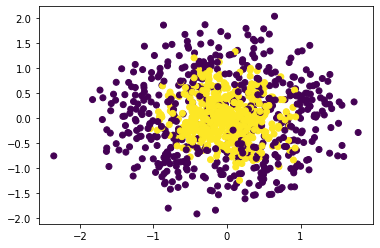

In [26]:
plt.scatter(X[:,0], X[:,1], c=y)

Let's apply Decision Tree model to the above dataset

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

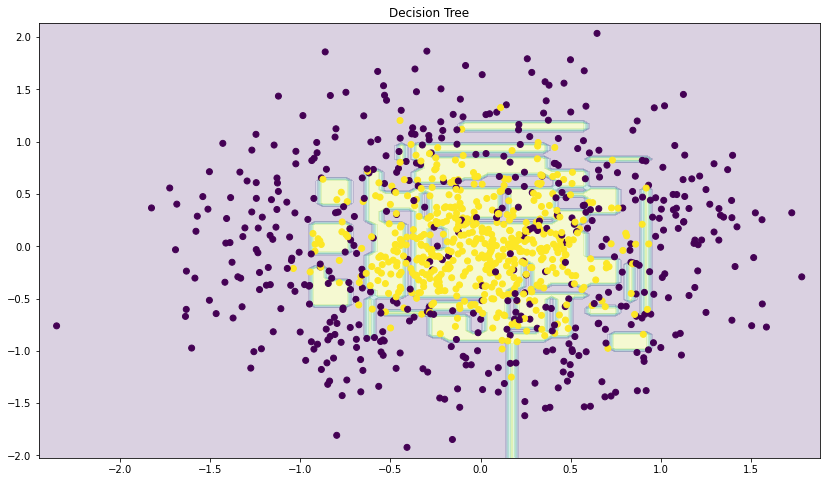

In [28]:
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

xx,yy = np.meshgrid(np.linspace(x_min, x_max,100), np.linspace(y_min,y_max,100))
x_p = np.c_[xx.ravel(), yy.ravel()]
y_pred = dt.predict(x_p).reshape(xx.shape)

plt.figure(figsize=(14,8))

plt.contourf(xx,yy,y_pred,alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Decision Tree')
plt.show()

<h4>We can clearly see the model is overfitting. This creates high variance</h4>


In [31]:
y_pred = dt.predict(X_test)

print("Accuracy: ",np.mean(accuracy_score(y_pred,y_test)))

Accuracy:  0.765


Now let's use Random Forest and check whether we can handle the overfitting i.e., high variance problem

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred_rf = rf.predict(X_test)

print("Accuracy: ",np.mean(accuracy_score(y_pred_rf,y_test)))

Accuracy:  0.8


As we can see the test accuracy score has increased

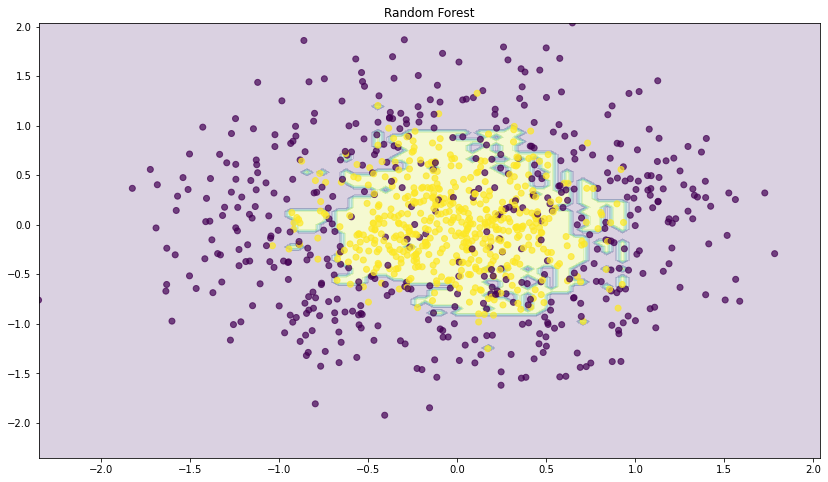

In [45]:

x_range= np.linspace(X.min(), X.max(),100)
xx,yy = np.meshgrid(x_range, x_range)
x_input = np.c_[xx.ravel(),yy.ravel()]

y_pred = rf.predict(x_input).reshape(xx.shape)

plt.figure(figsize=(14,8))

plt.contourf(xx, yy, y_pred, alpha=0.2)
plt.scatter(X[:,0], X[:,1],c=y, alpha=0.7)
plt.title("Random Forest")
plt.show()

<h4>We can see that the overfitting has been reduced (i.e., the model is not trying to capture every yellow point)</h4>